In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.express as px
import plotly.express as px
import numpy as np
url= os.path.join(os.getcwd(), "data", "Base_Prueba.xlsx")
data = pd.read_excel(url, sheet_name="Sheet1")
data=data[['Edad','Ingresos','Gastos','Ahorros','Puntaje_Crediticio']]

1. Preparacion de datos 


In [7]:
## Preparacion datos 
data['Edad'] = data['Edad'].astype('int')
data['Ingresos'] = data['Ingresos'].astype('int')
data['Gastos'] = data['Gastos'].astype('int')
data['Ahorros'] = data['Ahorros'].astype('int')
data['Puntaje_Crediticio'] = data['Puntaje_Crediticio'].astype('int')

np.int64(0)

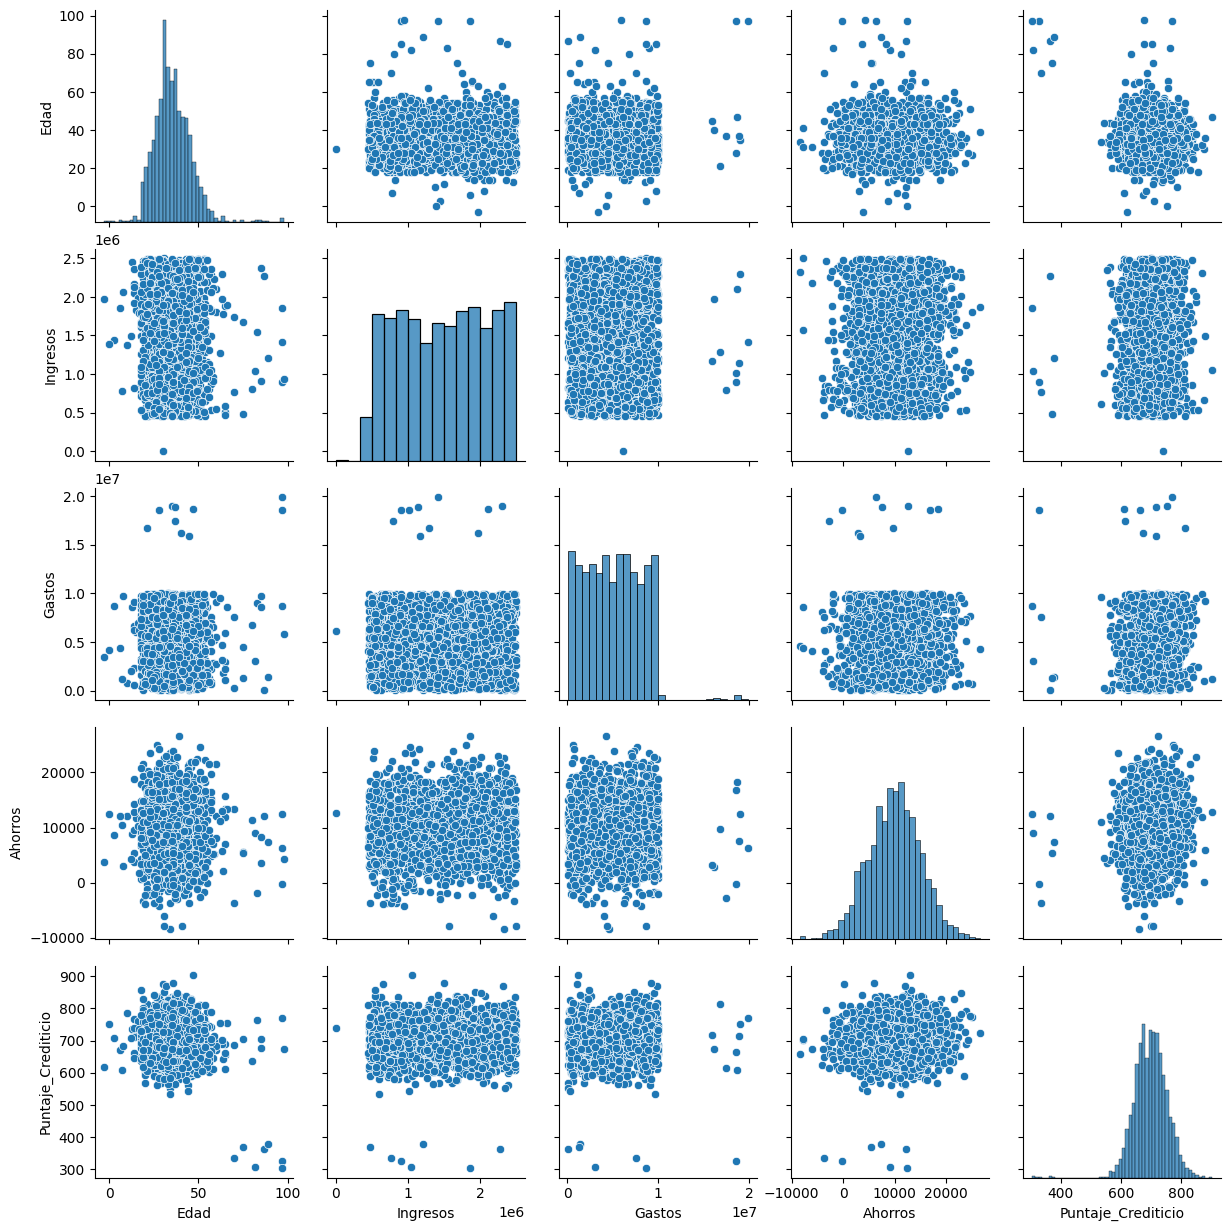

In [10]:
import seaborn as sns
#grafico de dispersion variables numericas
sns.pairplot(data)

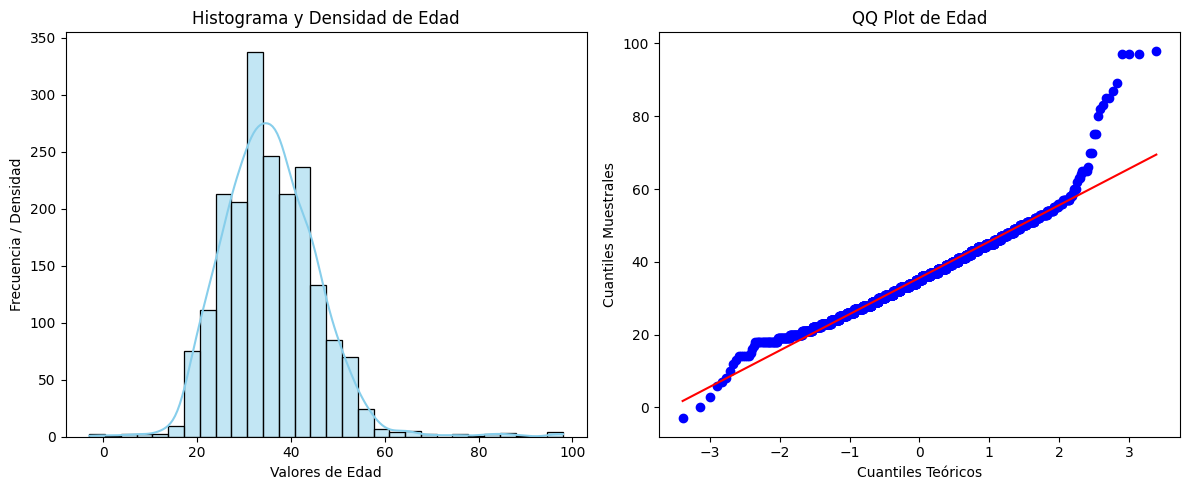

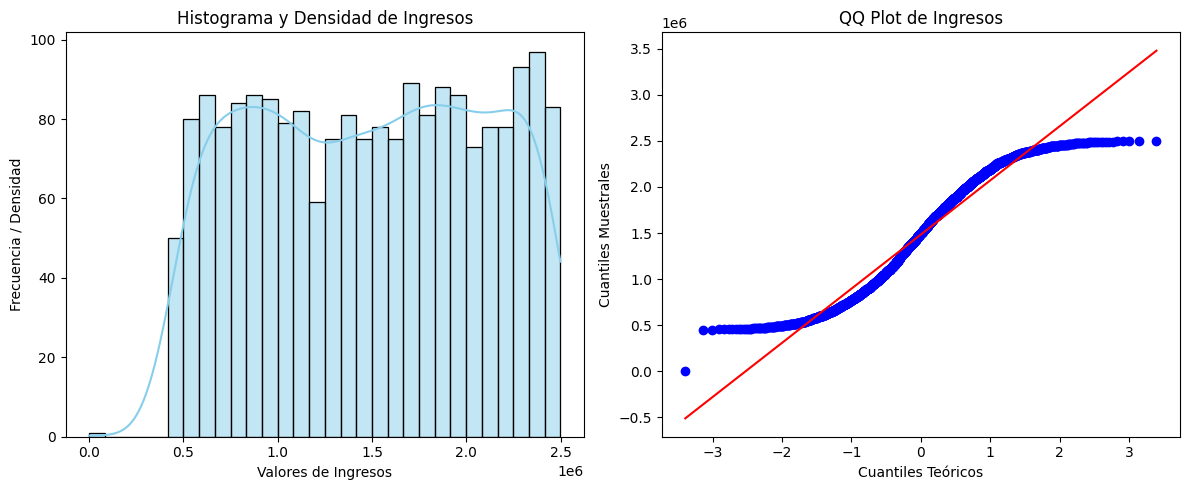

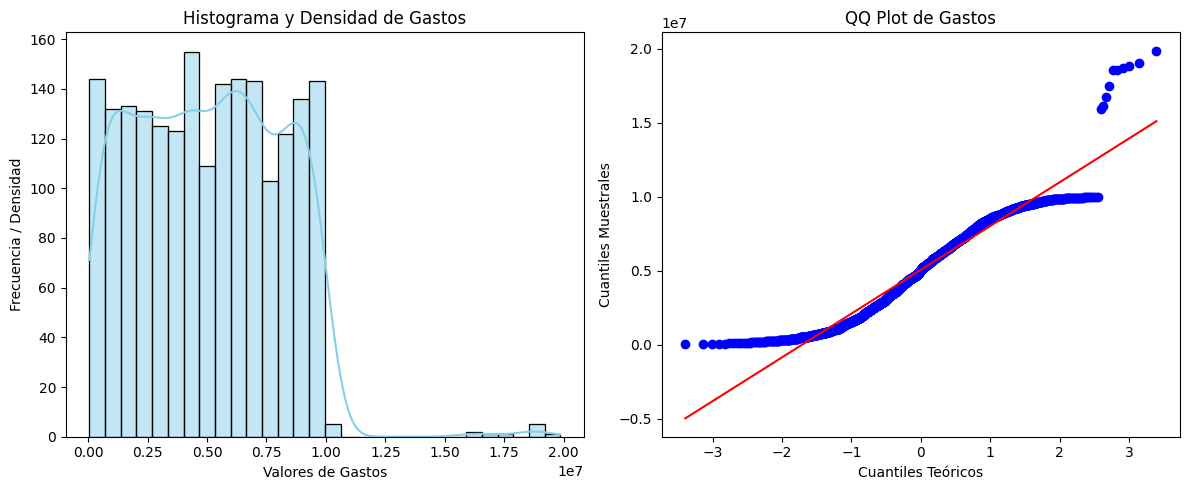

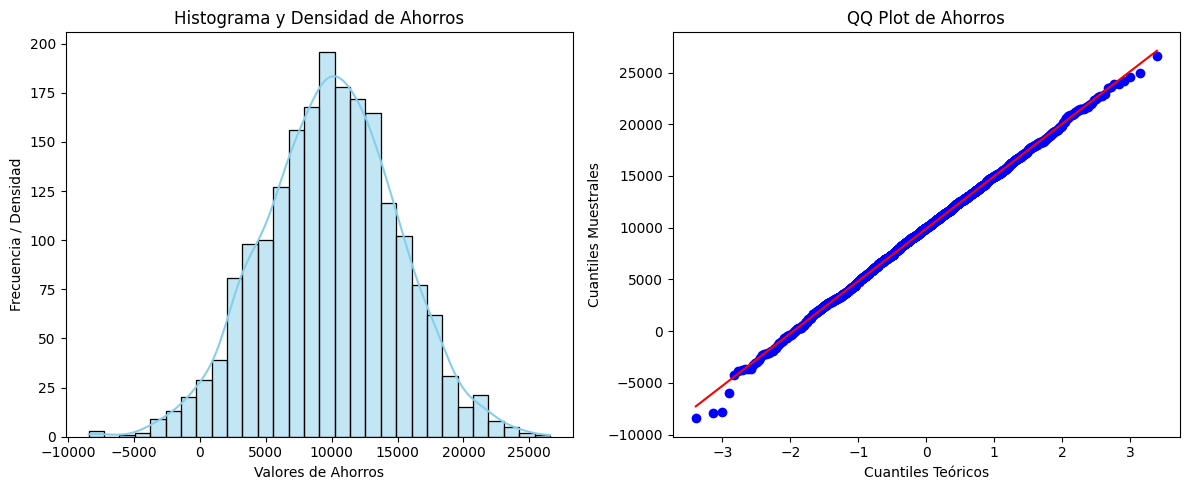

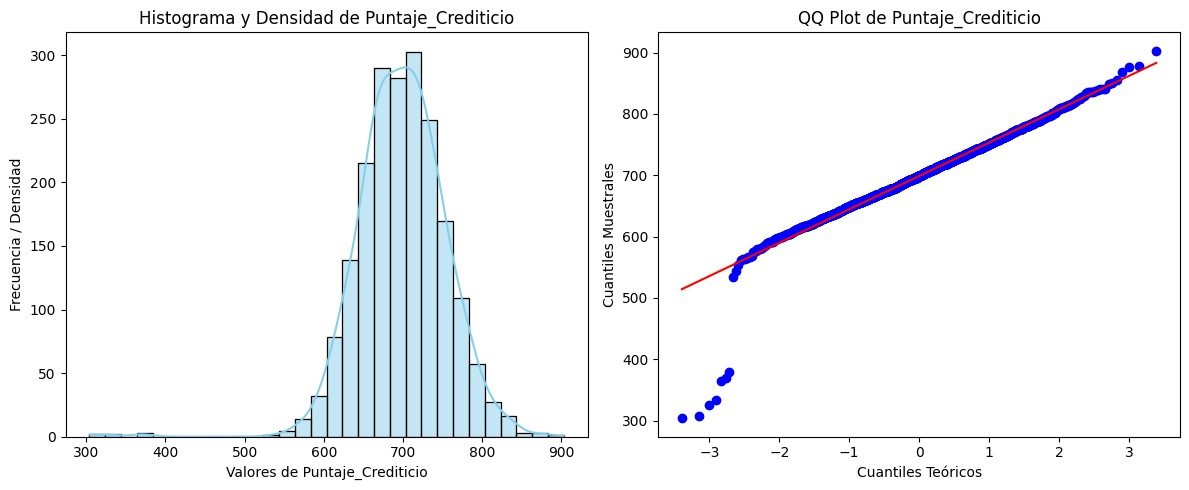

In [11]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import probplot
for i in data.columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5)) 
    sns.histplot(data[i].values, kde=True, ax=ax[0], bins=30, color="skyblue", edgecolor="black")
    ax[0].set_title(f"Histograma y Densidad de {i}")
    ax[0].set_xlabel(f"Valores de {i}")
    ax[0].set_ylabel("Frecuencia / Densidad")
    probplot(data[i], dist="norm", plot=plt)
    ax[1].set_title(f"QQ Plot de {i}")
    ax[1].set_xlabel("Cuantiles Teóricos")
    ax[1].set_ylabel("Cuantiles Muestrales")
    plt.tight_layout()
    plt.show()